In [20]:
from mplsoccer import Pitch, FontManager
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

from mplsoccer import VerticalPitch, add_image, FontManager

In [2]:
#reading the data into a pandas dataframe
df = pd.read_csv('/Users/timi/Desktop/jadon sancho assists map.csv')
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,sancho,Cross,0,40,28,76,10,44
1,Home,sancho,Pass,0,53,20,67,6,60
2,Home,sancho,Pass,1,4,22,34,11,34
3,Home,sancho,Cross,1,23,0,100,2,45
4,Home,sancho,Pass,1,43,7,69,8,62
5,Home,sancho,Pass,1,51,32,51,23,65
6,Home,sancho,Pass,2,8,24,95,16,72
7,Home,sancho,Pass,2,16,20,21,21,31
8,Home,sancho,Cross,2,37,0,0,8,48
9,Home,sancho,Cross,3,12,8,74,3,39


In [3]:
#converting the location data to a 120 x 80 pitch size.
df['X'] = df['X']*1.2
df['Y'] = df['Y']*0.8
df['X2'] = df['X2']*1.2
df['Y2'] = df['Y2']*0.8

In [4]:
#segregating the pass and cross assists into seprate dataframes
pass_assist = df[df['Event']== 'Pass']
cross_assist = df[df['Event']== 'Cross']

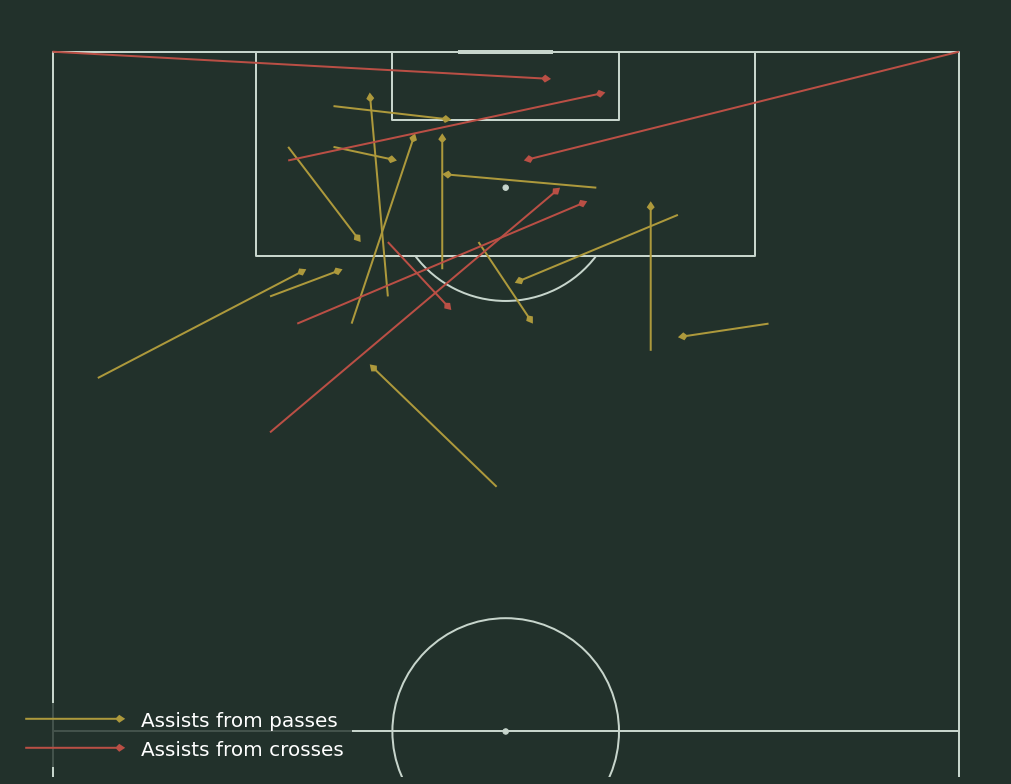

In [35]:
#plotting the pitch.
pitch = VerticalPitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc',half = True,goal_type = 'line',linewidth = 2)
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=True)
fig.set_facecolor('#22312b')

# Plot the completed passes
pitch.arrows(120 - pass_assist.X, pass_assist.Y,
             120 - pass_assist.X2,pass_assist.Y2, width=2,
             headwidth=4, headlength=3, color='#ad993c', ax=ax, label='Assists from passes')




pitch.arrows(120 - cross_assist.X, cross_assist.Y,
             120 - cross_assist.X2,cross_assist.Y2, width=2,
             headwidth=4, headlength=3, color='#ba4f45', ax=ax, label='Assists from crosses')

plt.gca().invert_xaxis()

# setup the legend
ax.legend(facecolor='#22312b', handlelength=5, edgecolor='None', fontsize=20, loc='lower left', labelcolor = 'white')
plt.savefig('jadon sancho assist map.png',dpi=500,bbox_inches = 'tight')
